<a href="https://colab.research.google.com/github/Vothuw/homeworkAl/blob/main/2_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.7 MB/s eta 0:00:00


10.939849624060148
60.00000000000001


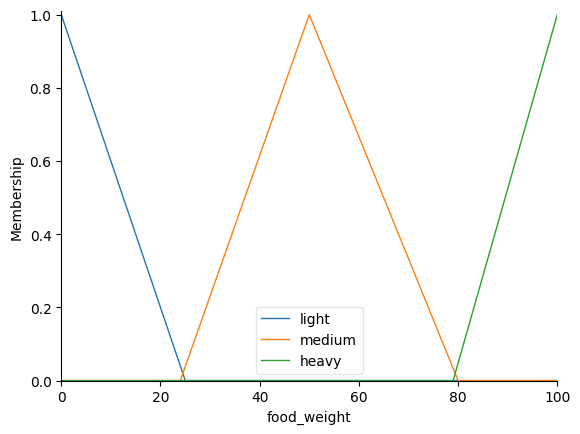

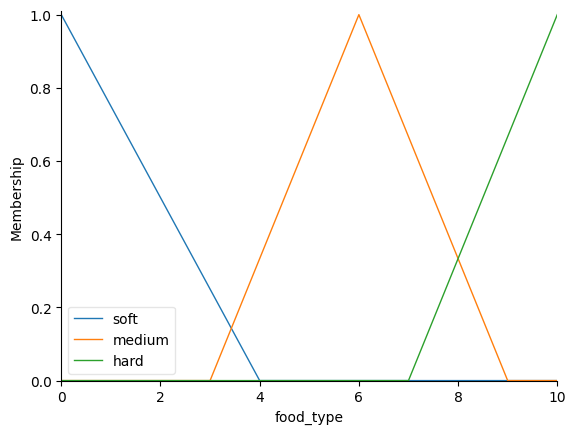

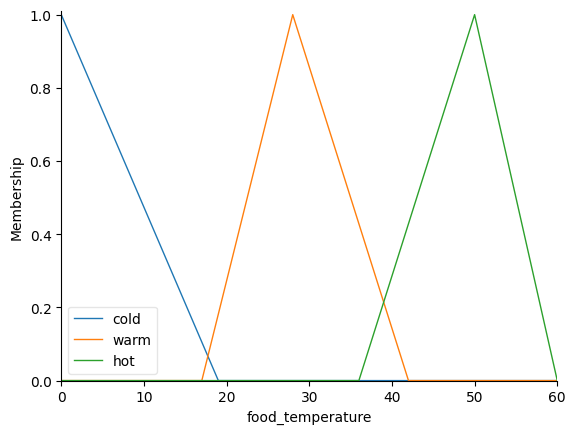

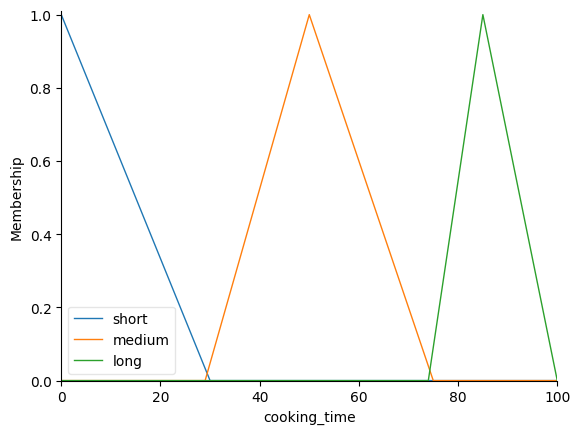

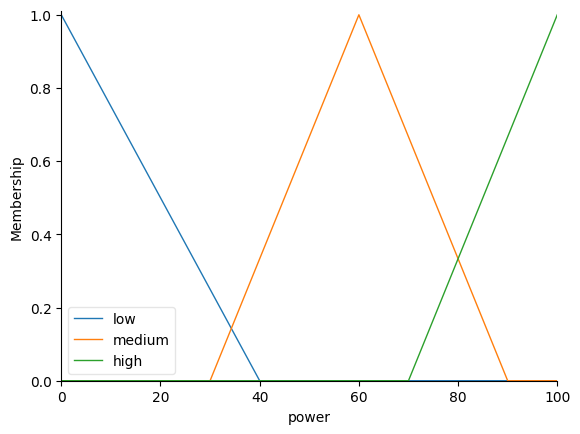

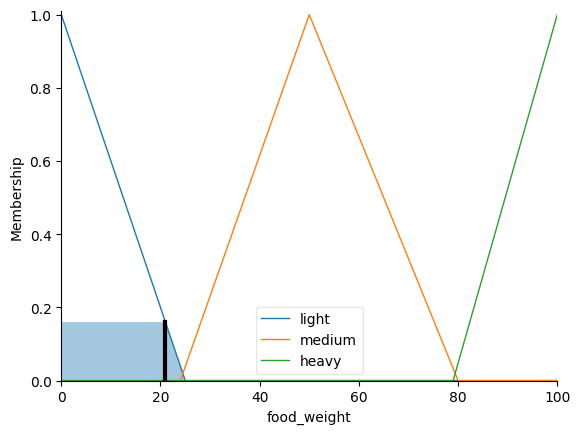

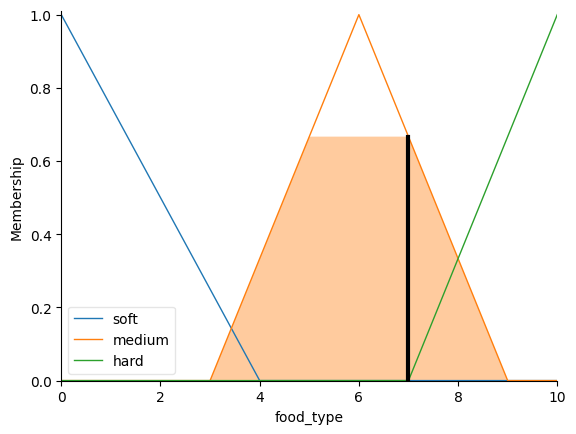

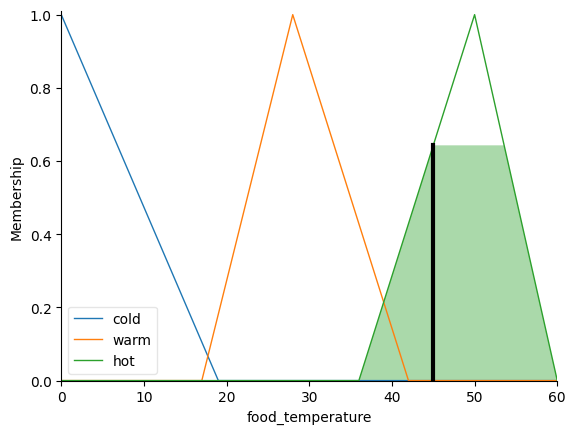

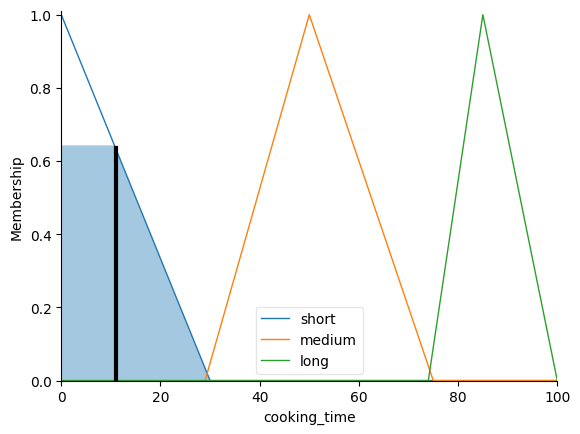

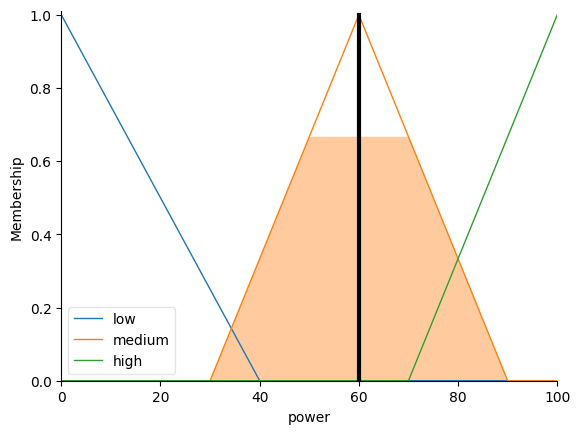

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food_weight = ctrl.Antecedent(np.arange(0, 101, 1), 'food_weight')
food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
food_temperature = ctrl.Antecedent(np.arange(0, 61, 1), 'food_temperature')
cooking_time = ctrl.Consequent(np.arange(0, 101, 1), 'cooking_time')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')

food_weight['light'] = fuzz.trimf(food_weight.universe, [0, 0, 25])
food_weight['medium'] = fuzz.trimf(food_weight.universe, [24, 50, 80])
food_weight['heavy'] = fuzz.trimf(food_weight.universe, [79, 100, 100])

food_type['soft'] = fuzz.trimf(food_type.universe, [0, 0, 4])
food_type['medium'] = fuzz.trimf(food_type.universe, [3, 6, 9])
food_type['hard'] = fuzz.trimf(food_type.universe, [7, 10, 10])

food_temperature['cold'] = fuzz.trimf(food_temperature.universe, [0, 0, 19])
food_temperature['warm'] = fuzz.trimf(food_temperature.universe, [17, 28, 42])
food_temperature['hot'] = fuzz.trimf(food_temperature.universe, [36, 50, 60])

cooking_time['short'] = fuzz.trimf(cooking_time.universe, [0, 0, 30])
cooking_time['medium'] = fuzz.trimf(cooking_time.universe, [29, 50, 75])
cooking_time['long'] = fuzz.trimf(cooking_time.universe, [74, 85, 100])

power['low'] = fuzz.trimf(power.universe, [0, 0, 40])
power['medium'] = fuzz.trimf(power.universe, [30, 60, 90])
power['high'] = fuzz.trimf(power.universe, [70, 100, 100])

food_weight.view()
food_type.view()
food_temperature.view()
cooking_time.view()
power.view()

rule1 = ctrl.Rule(food_weight['light'], cooking_time['short'])
rule2 = ctrl.Rule(food_weight['medium'], cooking_time['medium'])
rule3 = ctrl.Rule(food_weight['heavy'], cooking_time['long'])

rule4 = ctrl.Rule(food_type['soft'], power['low'])
rule5 = ctrl.Rule(food_type['medium'], power['medium'])
rule6 = ctrl.Rule(food_type['hard'], power['high'])

rule7 = ctrl.Rule(food_temperature['cold'], cooking_time['long'])
rule8 = ctrl.Rule(food_temperature['warm'], cooking_time['medium'])
rule9 = ctrl.Rule(food_temperature['hot'], cooking_time['short'])

rule10 = ctrl.Rule(food_weight['heavy'] & food_type['hard'] & food_temperature['cold'], (cooking_time['long'], power['high']))
rule11 = ctrl.Rule(food_weight['medium'] & food_type['soft'] & food_temperature['warm'], (cooking_time['medium'], power['low']))
rule12 = ctrl.Rule(food_weight['light'] & food_type['medium'] & food_temperature['hot'], (cooking_time['short'], power['medium']))
fuzzy_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
cooking_system = ctrl.ControlSystemSimulation(fuzzy_system)
cooking_system.input['food_weight'] =21
cooking_system.input['food_type'] = 7
cooking_system.input['food_temperature'] = 45
cooking_system.compute()
print(cooking_system.output['cooking_time'])
print(cooking_system.output['power'])
food_weight.view(sim=cooking_system)
food_type.view(sim=cooking_system)
food_temperature.view(sim=cooking_system)
cooking_time.view(sim=cooking_system)
power.view(sim=cooking_system)